<a href="https://colab.research.google.com/github/makarfedorov/topic_modeling_paraliterature/blob/main/Topic_Model_Fedorov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!wget https://github.com/makarfedorov/topic_modeling_paraliterature/blob/main/scraping_ficbook/Corpus/corpus_fanfic.zip
#!unzip corpus_fanfic.zip
# я использовал файл, лежащий на гугл диске по адресу: https://drive.google.com/drive/folders/1uEnZJDzty2u0h9O1pdhPHcUIzeWss8xI?usp=sharing
!pip install pyldavis
import os
import pandas as pd
fanfic_data = pd.read_csv("/content/drive/MyDrive/ficbook_one_file/corpus_fanfic.csv")
os.chdir("/content")



In [2]:
from nltk.tokenize import word_tokenize 
from nltk import download as nltk_download 
nltk_download ('punkt')
!wget https://raw.githubusercontent.com/dhhse/dh2020/master/data/stop_ru.txt
with open ('stop_ru.txt', 'r') as stop_file:
    rus_stops = [word.strip() for word in stop_file.readlines()]
punctuation = '!\"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~—»«...–'    
filter = rus_stops + list (punctuation)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
--2021-06-20 14:40:21--  https://raw.githubusercontent.com/dhhse/dh2020/master/data/stop_ru.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5823 (5.7K) [text/plain]
Saving to: ‘stop_ru.txt.4’

stop_ru.txt.4       100%[===================>]   5.69K  --.-KB/s    in 0s      

2021-06-20 14:40:21 (40.8 MB/s) - ‘stop_ru.txt.4’ saved [5823/5823]



In [3]:
!pip install pymorphy2
from pymorphy2 import MorphAnalyzer
parser = MorphAnalyzer ()

In [4]:
def preprocess (input_text):
    tokenized_text = word_tokenize (input_text.lower())
    clean_text = [word for word in tokenized_text if word not in filter]
    lemmatized_text = [parser.parse(word)[0].normal_form for word in clean_text]
    return lemmatized_text

In [5]:
fanfic_data['text_processed'] = fanfic_data['text'].map(preprocess)
fanfic_data.head()

,Unnamed: 0,id,author,title,link,description,tag,likes,date,review,size,text,rating,parts,romance,fandom,genre,page,text_processed
0,0,1,Olivia,Герои недописанных историй,/readfic/1920934,"Герои недописанных историй,\r\nзамерзшие во л...","Ангст,Драма,Стихи",13474,2014-04-28,1118,162,"Герои недописанных историй,\r\nЗамерзшие во ль...",G,Нет,Джен,Ориджиналы,Ангст,1,"[герой, недописанный, история, замёрзнуть, лёд..."
1,1,2,Джoкер,О войне писали много,/readfic/1743853,"Прах от тел, скелеты зданий,\r\nЛес сгоревший ...","Ангст,Драббл,Стихи",6621,2014-03-05,432,138,"О войне писали много,\r\nКак летит на землю пл...",G,Нет,Джен,Ориджиналы,Ангст,1,"[война, писать, лететь, земля, пламень, миг, с..."
2,2,3,лунный мечтатель полтергейста,Невыносимое создание,/readfic/8603938,У мальчишки Поттера глаза его деда и та же при...,"AU,Ангст,Детская влюбленность,Дружба,Наставнич...",5398,2019-09-03,97,1586,- Ты! Ты украл у меня слугу! \r\n Л...,PG-13,Нет,Джен,"Роулинг Джоан «Гарри Поттер»,Гарри Поттер",Ангст,1,"[украсть, слуга, люциус, хвататься, палочка, ж..."
3,3,4,Хана_Вишнёвая,Ангелы падают,/readfic/1119388,Серый асфальт – конечная.,"Ангст,Драббл,Стихи,Эксперимент",5217,2013-08-19,181,127,Ангелы падают.\r\nАнгелы падают вниз.\r\nКрыль...,G,Нет,Джен,Ориджиналы,Ангст,1,"[ангел, падать, ангел, падать, крыло, держать,..."
4,4,5,LuckyLuke,Меня зовут Сэм,/readfic/3911101,"Меня зовут Сэм. Вернее, звали - в последней жи...","Hurt/Comfort,Ангст,Соулмейты,Эксперимент",4883,2015-12-29,403,3432,"Меня зовут Сэм. Вернее, звали — в последней жи...",R,Нет,Джен,Ориджиналы,Ангст,1,"[звать, сэм, верный, звать, последний, жизнь, ..."


In [ ]:
fanfic_data["fandom"].unique()
# Роулинг Джоан «Гарри Поттер»,Гарри Поттер', Железный человек,Мстители,Человек-паук: Возвращение домой,  Вдали от дома', 'Железный человек,Первый мститель,Человек-паук: Возвращение домой,  Вдали от дома
# 'Железный человек,Первый мститель,Доктор Стрэндж,Человек-паук: Возвращение домой,  Вдали от дома',


array(['Ориджиналы', 'Роулинг Джоан «Гарри Поттер»,Гарри Поттер',
       'Фикбук и всё, что с ним связано',
       'Железный человек,Мстители,Человек-паук: Возвращение домой,  Вдали от дома',
       'Железный человек,Первый мститель,Человек-паук: Возвращение домой,  Вдали от дома',
       'Hetalia: Axis Powers',
       'Сверхъестественное,Доктор Кто,Шерлок (BBC),Мерлин,Отбросы,Теория Большого взрыва,Однажды в сказке,Американская история ужасов,Ходячие мертвецы,Ганнибал',
       'Железный человек,Мстители,Первый мститель,Человек-паук: Возвращение домой,  Вдали от дома',
       'Звездные Войны', 'Katekyo Hitman Reborn!',
       'Железный человек,Первый мститель,Доктор Стрэндж,Человек-паук: Возвращение домой,  Вдали от дома',
       'Роулинг Джоан «Гарри Поттер»', 'Сверхъестественное', 'Death Note',
       'Тор,Железный человек,Мстители,Первый мститель,Доктор Стрэндж,Человек-паук: Возвращение домой,  Вдали от дома,Черная Пантера',
       'Bleach,Katekyo Hitman Reborn!', 'Bleach',
       '

In [6]:
def standart(fandoms):
    fandom_dictionary = {"Роулинг Джоан «Гарри Поттер»":"Гарри Поттер", "Первый мститель":"Марвел",\
     "Железный человек":"Марвел","Человек-паук: Возвращение домой,  Вдали от дома":"Марвел",\
     "Доктор Стрэндж":"Марвел", "Толкин Джон Р.Р. «Властелин колец»":"Властелин Колец",\
     "Тор":"Марвел", "Толкин Джон Р. Р. «Хоббит, или Туда и обратно»":"Властелин Колец",\
     "Капитан Марвел":"Марвел", "Сапковский Анджей «Ведьмак» (Сага о ведьмаке)":"Ведьмак", "The Witcher":"Ведьмак",\
     "Мартин Джордж «Песнь Льда и Пламени»":"Игра Престолов", "Boruto: Naruto Next Generations":"Naruto",\
     "Коллинз Сьюзен «Голодные игры»":"Голодные игры", "Удивительный Человек-паук":"Марвел",\
     "Доктор Стрэндж и тайна Ордена магов":"Марвел", "Фантастические твари":"Гарри Поттер",\
     "Marvel Comics":"Марвел","Тор,Доктор Стрэндж":"Марвел", "Мстители,Доктор Стрэндж":"Марвел",\
     "Дэдпул,Дэдпул":"Марвел", "Черная Пантера":"Марвел", "  Вдали от дома":"Марвел",\
     "Мстители":"Марвел", "Новый Человек-паук":"Марвел", "Человек-паук: Возвращение домой":"Марвел",\
     "Человек-Паук":"Марвел", "Хоббит":"Властелин Колец", "Человек-паук: Через Вселенные":"Марвел",\
     "Человек-паук":"Марвел", "Веном":"Марвел", "Стражи Галактики":"Марвел","Дэдпул":"Марвел",\
     "Черная вдова":"Марвел", "Халк":"Марвел"}
    sig_list = ["Ориджиналы", "Гарри Поттер", "Марвел", "Чудесная божья коровка (Леди Баг и Супер-Кот)", "Bangtan Boys (BTS)",\
                "Однажды в сказке","Fairy Tail", "Сотня", "Naruto", "Волчонок"]
    standart_fandoms = []
    fandoms = fandoms.split(",")
    for fandom in fandoms:
        if fandom in fandom_dictionary:
            fandom = fandom_dictionary[fandom]
            

        if fandom in sig_list:
            standart_fandoms.append(fandom)
        else: 
            standart_fandoms.append("Прочее")    
    #if len(standart_fandoms) > 1:
           #standart_fandoms = "Кроссовер"
    #else: 
        #standart_fandoms = "".join(standart_fandoms)       
    final = list(set(standart_fandoms)) 
    if len(final) > 1:
        final = "Кроссовер"
    else:
        final = final[0]
    return final        
            
       
      
        

In [7]:
fanfic_data["standart_fandom"] = fanfic_data["fandom"].apply(standart)
fandoms = fanfic_data["standart_fandom"].value_counts()
print(fandoms)
fandoms.to_csv("fandoms3.csv")
0.273125 + 0.1225 + 0.104375 + 0.061875 + 0.049375 + 0.038125 + 0.029375 + 0.028125 + 0.024375 + 0.021875

Ориджиналы                                       437
Прочее                                           343
Гарри Поттер                                     196
Марвел                                           167
Чудесная божья коровка (Леди Баг и Супер-Кот)     99
Bangtan Boys (BTS)                                79
Однажды в сказке                                  61
Кроссовер                                         52
Fairy Tail                                        47
Сотня                                             45
Naruto                                            39
Волчонок                                          35
Name: standart_fandom, dtype: int64


0.753125

In [8]:
import gensim
gensim_dictionary_for_TM = gensim.corpora.Dictionary(fanfic_data['text_processed'])
gensim_dictionary_for_TM.filter_extremes(no_above=0.1, no_below=20)
gensim_dictionary_for_TM.compactify()
print(gensim_dictionary_for_TM)

Dictionary(8488 unique tokens: ['архив', 'градус', 'забытый', 'замёрзнуть', 'зимний']...)


In [9]:
corpus = [gensim_dictionary_for_TM.doc2bow(text) for text in fanfic_data['text_processed']]

In [ ]:
lda = gensim.models.LdaMulticore(corpus, 
                                 num_topics = 20, 
                                 id2word=gensim_dictionary_for_TM, 
                                 passes=10, random_state = 6457)

In [ ]:
lda.print_topics()
fw = open("topics_20.txt", "w", encoding = "utf-8")
for topic in lda.print_topics():
    fw.write(str(topic)) 
    print(str(topic))
fw.close()    

(0, '0.018*"мститель" + 0.018*"стив" + 0.013*"старка" + 0.010*"паркер" + 0.008*"пятница" + 0.008*"наташа" + 0.007*"паучок" + 0.007*"флэш" + 0.005*"бак" + 0.005*"паук"')
(1, '0.047*"кларк" + 0.036*"лекса" + 0.025*"люси" + 0.014*"лекс" + 0.013*"гриффин" + 0.012*"наца" + 0.009*"леви" + 0.008*"дракон" + 0.008*"гильдия" + 0.006*"брюнетка"')
(2, '0.002*"волк" + 0.002*"сигарета" + 0.002*"мужик" + 0.002*"госпожа" + 0.001*"хозяйка" + 0.001*"промежность" + 0.001*"оборотень" + 0.001*"рывок" + 0.001*"лапа" + 0.001*"царапать"')
(3, '0.052*"хосока" + 0.042*"намджуна" + 0.040*"джина" + 0.034*"тэхить" + 0.021*"юнга" + 0.019*"ведьма" + 0.017*"чимин" + 0.007*"чулок" + 0.005*"майка" + 0.005*"вставить"')
(4, '0.063*"маринетта" + 0.041*"адриан" + 0.028*"чимин" + 0.028*"нуар" + 0.024*"юнга" + 0.022*"ледибаг" + 0.008*"адриана" + 0.008*"алья" + 0.007*"агресть" + 0.005*"париж"')
(5, '0.075*"чонгук" + 0.041*"тэхить" + 0.020*"чимин" + 0.015*"чон" + 0.013*"юнга" + 0.010*"ким" + 0.009*"тэ" + 0.009*"тэхёный" + 0.00

In [ ]:
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda, texts=fanfic_data['text_processed'], dictionary=gensim_dictionary_for_TM, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.43544375055128504


In [17]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
   
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, passes=10, num_topics=num_topics, random_state = 6457)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

Выходные данные были обрезаны до нескольких последних строк (5000).
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sc

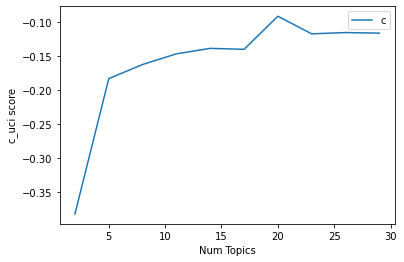

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=gensim_dictionary_for_TM, corpus=corpus, texts=fanfic_data['text_processed'], start=2, limit=30, step=3)
import matplotlib.pyplot as plt
limit=30; start=2; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("c_uci score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=gensim_dictionary_for_TM, corpus=corpus, texts=fanfic_data['text_processed'], start=2, limit=30, step=3)
# Show graph
import matplotlib.pyplot as plt
limit=30; start=2; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
!pip install pyldavis

     |████████████████████████████████| 1.7MB 8.0MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.3MB 191kB/s 
     |████████████████████████████████| 9.9MB 34.2MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-cp37-none-any.whl size=136897 sha256=0c8d51b865e85eec3f3fdd62fba33c1bcd3d23aba1caa50fb7cc84f36a404437
  Stored in directory: /root/.cache/pip/wheels/a0/9c/fc/c6e00689d35c82cf96a8adc70edfe7ba7904374fdac3240ac2
Successfully built pyldavis
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.20.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0

In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [ ]:
vis = gensimvis.prepare(lda, corpus, gensim_dictionary_for_TM)

In [ ]:
pyLDAvis.enable_notebook()

In [ ]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.070247  0.000781       1        1  15.646825
13     0.027731  0.082017       2        1  10.861624
6     -0.031639  0.008645       3        1   7.619471
15    -0.024168  0.041568       4        1   7.476560
14     0.000699  0.013968       5        1   7.065588
5     -0.106626 -0.126545       6        1   5.408595
1     -0.036356  0.031391       7        1   5.199683
9     -0.013112  0.021358       8        1   5.174063
16     0.158394 -0.050312       9        1   5.077345
19    -0.026319  0.073699      10        1   4.605547
4     -0.023291 -0.069488      11        1   3.772369
10    -0.014431  0.067811      12        1   3.540358
0      0.201208 -0.050771      13        1   3.335618
7     -0.006847  0.003255      14        1   2.916647
18    -0.038897  0.131605      15        1   2.792419
12     0.005908  0.068607      16        1   2.671667
8     -0.032905  0.020062      17        1   2.055320
11     0.212577 -0.108429      18        1   1.923588
17    -0.001667  0.035016      19        1   1.657958
3     -0.180013 -0.194239      20        1   1.198755, topic_info=           Term         Freq        Total Category  logprob  loglift
7066       эмма  3586.000000  3586.000000  Default  30.0000  30.0000
7683     чонгук  3705.000000  3705.000000  Default  29.0000  29.0000
858    гермиона  3249.000000  3249.000000  Default  28.0000  28.0000
7706     стайлз  2487.000000  2487.000000  Default  27.0000  27.0000
7984     тэхить  2361.000000  2361.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
6057  облизнуть    21.542295   137.242263  Topic20  -6.2177   2.5722
1202  оборотень    32.214442   686.533660  Topic20  -5.8153   1.3646
2922      парта    29.429544   566.892260  Topic20  -5.9057   1.4657
7683     чонгук    38.529272  3705.604345  Topic20  -5.6363  -0.1423
4890     цветок    23.580472   448.263117  Topic20  -6.1273   1.4789

[1032 rows x 6 columns], token_table=      Topic      Freq Term
term                      
3208      2  0.038824    2
3208      3  0.038824    2
3208      4  0.067942    2
3208      5  0.097059    2
3208      6  0.019412    2
...     ...       ...  ...
235       8  0.015524    ”
235       9  0.002587    ”
235      10  0.005175    ”
235      13  0.005175    ”
235      14  0.007762    ”

[8490 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 14, 7, 16, 15, 6, 2, 10, 17, 20, 5, 11, 1, 8, 19, 13, 9, 12, 18, 4])

In [ ]:
pyLDAvis.save_html(vis, 'intertopic_distance_20.html')


In [23]:

def get_topic(words):
    bag = lda.id2word.doc2bow(words)
    topics = lda.get_document_topics(bag)
    topic_dictionary = {}
    for topic in topics:
        topic_dictionary[topic[1]] = str((topic[0])) 
    main_probability = max(topic_dictionary)
    main_topic = topic_dictionary[main_probability]
    return [main_topic,main_probability]


In [ ]:
fanfic_data["t"]  = fanfic_data['text_processed'].apply(get_topic)

In [ ]:
fanfic_data["topic"] = fanfic_data["t"].str[0]
fanfic_data["probability"] = fanfic_data["t"].str[1]
del fanfic_data['t']
fanfic_data.head()

,Unnamed: 0,id,author,title,link,description,tag,likes,date,review,size,text,rating,parts,romance,fandom,genre,page,text_processed,standart_fandom,topic,probability
0,0,1,Olivia,Герои недописанных историй,/readfic/1920934,"Герои недописанных историй,\r\nзамерзшие во л...","Ангст,Драма,Стихи",13474,2014-04-28,1118,162,"Герои недописанных историй,\r\nЗамерзшие во ль...",G,Нет,Джен,Ориджиналы,Ангст,1,"[герой, недописанный, история, замёрзнуть, лёд...",Ориджиналы,10,0.602009
1,1,2,Джoкер,О войне писали много,/readfic/1743853,"Прах от тел, скелеты зданий,\r\nЛес сгоревший ...","Ангст,Драббл,Стихи",6621,2014-03-05,432,138,"О войне писали много,\r\nКак летит на землю пл...",G,Нет,Джен,Ориджиналы,Ангст,1,"[война, писать, лететь, земля, пламень, миг, с...",Ориджиналы,0,0.619998
2,2,3,лунный мечтатель полтергейста,Невыносимое создание,/readfic/8603938,У мальчишки Поттера глаза его деда и та же при...,"AU,Ангст,Детская влюбленность,Дружба,Наставнич...",5398,2019-09-03,97,1586,- Ты! Ты украл у меня слугу! \r\n Л...,PG-13,Нет,Джен,"Роулинг Джоан «Гарри Поттер»,Гарри Поттер",Ангст,1,"[украсть, слуга, люциус, хвататься, палочка, ж...",Гарри Поттер,13,0.749010
3,3,4,Хана_Вишнёвая,Ангелы падают,/readfic/1119388,Серый асфальт – конечная.,"Ангст,Драббл,Стихи,Эксперимент",5217,2013-08-19,181,127,Ангелы падают.\r\nАнгелы падают вниз.\r\nКрыль...,G,Нет,Джен,Ориджиналы,Ангст,1,"[ангел, падать, ангел, падать, крыло, держать,...",Ориджиналы,12,0.771712
4,4,5,LuckyLuke,Меня зовут Сэм,/readfic/3911101,"Меня зовут Сэм. Вернее, звали - в последней жи...","Hurt/Comfort,Ангст,Соулмейты,Эксперимент",4883,2015-12-29,403,3432,"Меня зовут Сэм. Вернее, звали — в последней жи...",R,Нет,Джен,Ориджиналы,Ангст,1,"[звать, сэм, верный, звать, последний, жизнь, ...",Ориджиналы,2,0.422483


In [ ]:
fanfic_data.describe()

,Unnamed: 0,id,likes,review,size,page,probability
count,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000
mean,49.500000,50.500000,3467.15375,82.578750,4438.070625,3.000000,0.683586
std,28.875095,28.875095,3728.00247,113.760548,5471.806264,1.414656,0.216427
min,0.000000,1.000000,148.00000,0.000000,3.000000,1.000000,0.050000
25%,24.750000,25.750000,1149.00000,22.000000,1484.500000,2.000000,0.512532
50%,49.500000,50.500000,2239.50000,52.000000,2734.000000,3.000000,0.680535
75%,74.250000,75.250000,4562.25000,104.000000,5140.500000,4.000000,0.871489
max,99.000000,100.000000,45435.00000,1967.000000,65620.000000,5.000000,0.999856


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 13.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 19.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


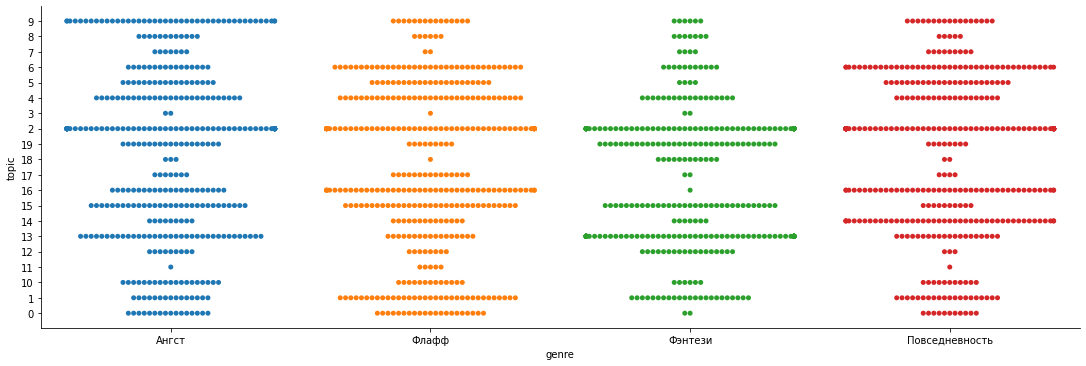

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.catplot(x="genre", y="topic", kind = "swarm",data=fanfic_data, height=5, aspect=3)

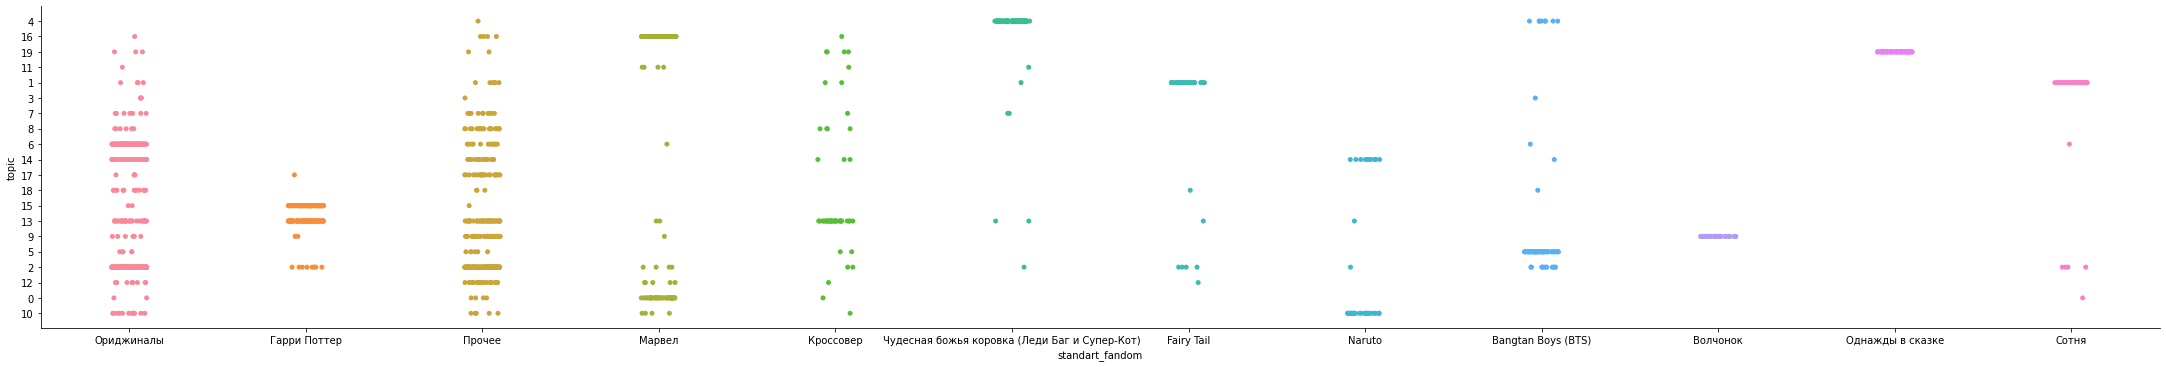

In [ ]:
sns.catplot(x="standart_fandom", y="topic", kind = "strip",data=fanfic_data, height=5, aspect=6)


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 17.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 28.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 46.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


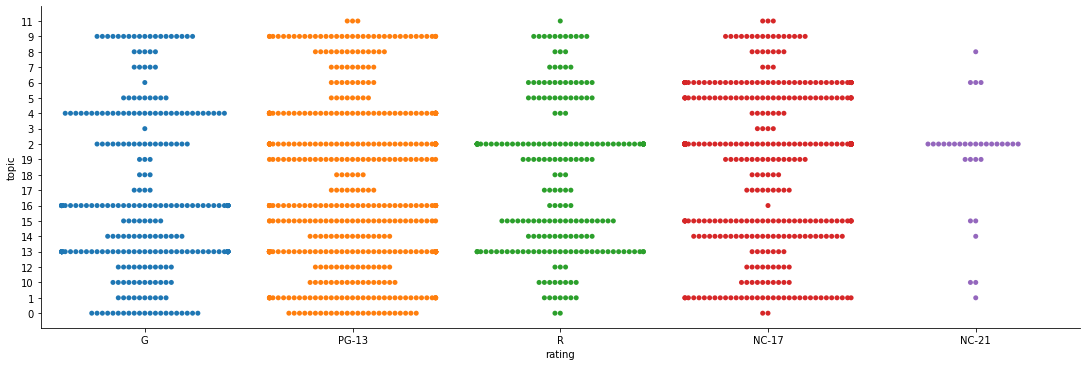

In [ ]:
sns.catplot(x="rating", y="topic", kind = "swarm",data=fanfic_data, height=5, aspect=3)


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 36.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 27.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


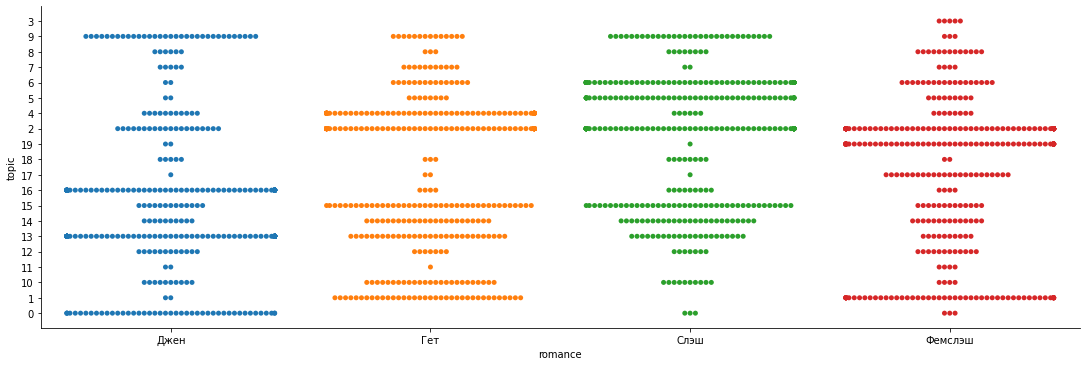

In [ ]:
sns.catplot(x="romance", y="topic", kind = "swarm",data=fanfic_data, height=5, aspect=3)


In [ ]:
lda_2 = gensim.models.LdaMulticore(corpus, 
                                 num_topics = 10, 
                                 id2word=gensim_dictionary_for_TM, 
                                 passes=10, random_state = 6457)

Выходные данные были обрезаны до нескольких последних строк (5000).
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sc

In [ ]:
vis_2 = gensimvis.prepare(lda_2, corpus, gensim_dictionary_for_TM)

In [ ]:
vis_2

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.028458  0.006646       1        1  23.072137
0     -0.114160 -0.071728       2        1  12.923334
3     -0.091322  0.072161       3        1  12.151813
7     -0.025096 -0.020506       4        1  10.596280
6      0.050182  0.013111       5        1   9.308082
5      0.179821 -0.014919       6        1   7.909127
1     -0.005987 -0.039774       7        1   7.122593
8     -0.014249  0.102498       8        1   6.849673
4     -0.007423 -0.129758       9        1   5.376038
9     -0.000223  0.082269      10        1   4.690922, topic_info=            Term         Freq        Total Category  logprob  loglift
7683      чонгук  3648.000000  3648.000000  Default  30.0000  30.0000
858     гермиона  3337.000000  3337.000000  Default  29.0000  29.0000
7706      стайлз  2482.000000  2482.000000  Default  28.0000  28.0000
7066        эмма  3631.000000  3631.000000  Default  27.0000  27.0000
80         драко  2671.000000  2671.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
8115       шериф    69.167038   399.769328  Topic10  -6.4155   1.3052
3241    перемена    61.726291   258.481799  Topic10  -6.5294   1.6274
2768      ведьма    81.305210   979.826284  Topic10  -6.2539   0.5704
97          лить    60.791937   256.840840  Topic10  -6.5446   1.6185
1615  тренировка    60.610628   454.366870  Topic10  -6.5476   1.0451

[519 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2750      2  0.989656  industries
6686      1  0.011009         pov
6686      2  0.055043         pov
6686      5  0.220171         pov
6686      7  0.682531         pov
...     ...       ...         ...
235       4  0.767560           ”
235       6  0.002674           ”
235       7  0.042791           ”
235       8  0.139070           ”
235      10  0.013372           ”

[3049 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 8, 7, 6, 2, 9, 5, 10])

In [ ]:
pyLDAvis.save_html(vis_2, 'intertopic_distance_10.html')


In [ ]:
fanfic_data["t"]  = fanfic_data['text_processed'].apply(get_topic)

In [ ]:
fanfic_data["topic"] = fanfic_data["t"].str[0]
fanfic_data["probability"] = fanfic_data["t"].str[1]
del fanfic_data['t']
fanfic_data.head()

,Unnamed: 0,id,author,title,link,description,tag,likes,date,review,size,text,rating,parts,romance,fandom,genre,page,text_processed,standart_fandom,topic,probability
0,0,1,Olivia,Герои недописанных историй,/readfic/1920934,"Герои недописанных историй,\r\nзамерзшие во л...","Ангст,Драма,Стихи",13474,2014-04-28,1118,162,"Герои недописанных историй,\r\nЗамерзшие во ль...",G,Нет,Джен,Ориджиналы,Ангст,1,"[герой, недописанный, история, замёрзнуть, лёд...",Ориджиналы,2,0.459940
1,1,2,Джoкер,О войне писали много,/readfic/1743853,"Прах от тел, скелеты зданий,\r\nЛес сгоревший ...","Ангст,Драббл,Стихи",6621,2014-03-05,432,138,"О войне писали много,\r\nКак летит на землю пл...",G,Нет,Джен,Ориджиналы,Ангст,1,"[война, писать, лететь, земля, пламень, миг, с...",Ориджиналы,4,0.367312
2,2,3,лунный мечтатель полтергейста,Невыносимое создание,/readfic/8603938,У мальчишки Поттера глаза его деда и та же при...,"AU,Ангст,Детская влюбленность,Дружба,Наставнич...",5398,2019-09-03,97,1586,- Ты! Ты украл у меня слугу! \r\n Л...,PG-13,Нет,Джен,"Роулинг Джоан «Гарри Поттер»,Гарри Поттер",Ангст,1,"[украсть, слуга, люциус, хвататься, палочка, ж...",Гарри Поттер,3,0.647270
3,3,4,Хана_Вишнёвая,Ангелы падают,/readfic/1119388,Серый асфальт – конечная.,"Ангст,Драббл,Стихи,Эксперимент",5217,2013-08-19,181,127,Ангелы падают.\r\nАнгелы падают вниз.\r\nКрыль...,G,Нет,Джен,Ориджиналы,Ангст,1,"[ангел, падать, ангел, падать, крыло, держать,...",Ориджиналы,3,0.714868
4,4,5,LuckyLuke,Меня зовут Сэм,/readfic/3911101,"Меня зовут Сэм. Вернее, звали - в последней жи...","Hurt/Comfort,Ангст,Соулмейты,Эксперимент",4883,2015-12-29,403,3432,"Меня зовут Сэм. Вернее, звали — в последней жи...",R,Нет,Джен,Ориджиналы,Ангст,1,"[звать, сэм, верный, звать, последний, жизнь, ...",Ориджиналы,2,0.554361


In [ ]:
fanfic_data.describe()

,Unnamed: 0,id,likes,review,size,page,probability
count,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000
mean,49.500000,50.500000,3467.15375,82.578750,4438.070625,3.000000,0.749690
std,28.875095,28.875095,3728.00247,113.760548,5471.806264,1.414656,0.199318
min,0.000000,1.000000,148.00000,0.000000,3.000000,1.000000,0.100000
25%,24.750000,25.750000,1149.00000,22.000000,1484.500000,2.000000,0.588683
50%,49.500000,50.500000,2239.50000,52.000000,2734.000000,3.000000,0.755785
75%,74.250000,75.250000,4562.25000,104.000000,5140.500000,4.000000,0.953182
max,99.000000,100.000000,45435.00000,1967.000000,65620.000000,5.000000,0.999864


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 23.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


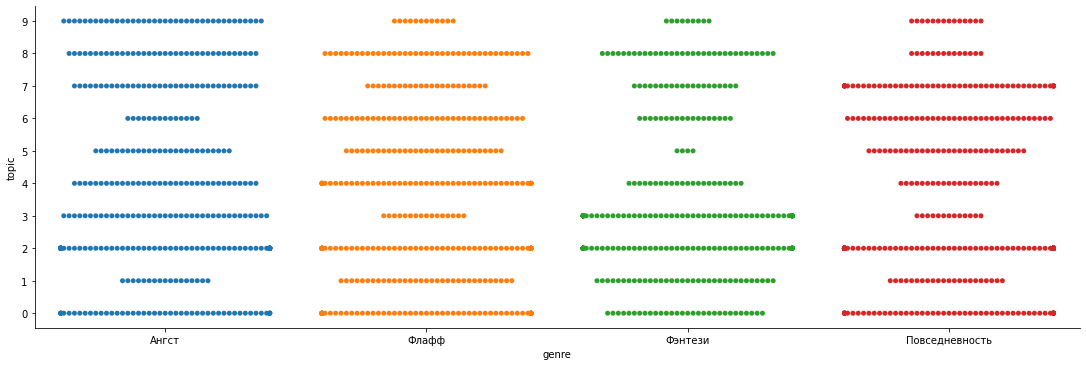

In [ ]:
sns.catplot(x="genre", y="topic", kind = "swarm",data=fanfic_data, height=5, aspect=3)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 68.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 68.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 74.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 68.7% of the points cannot be placed; y

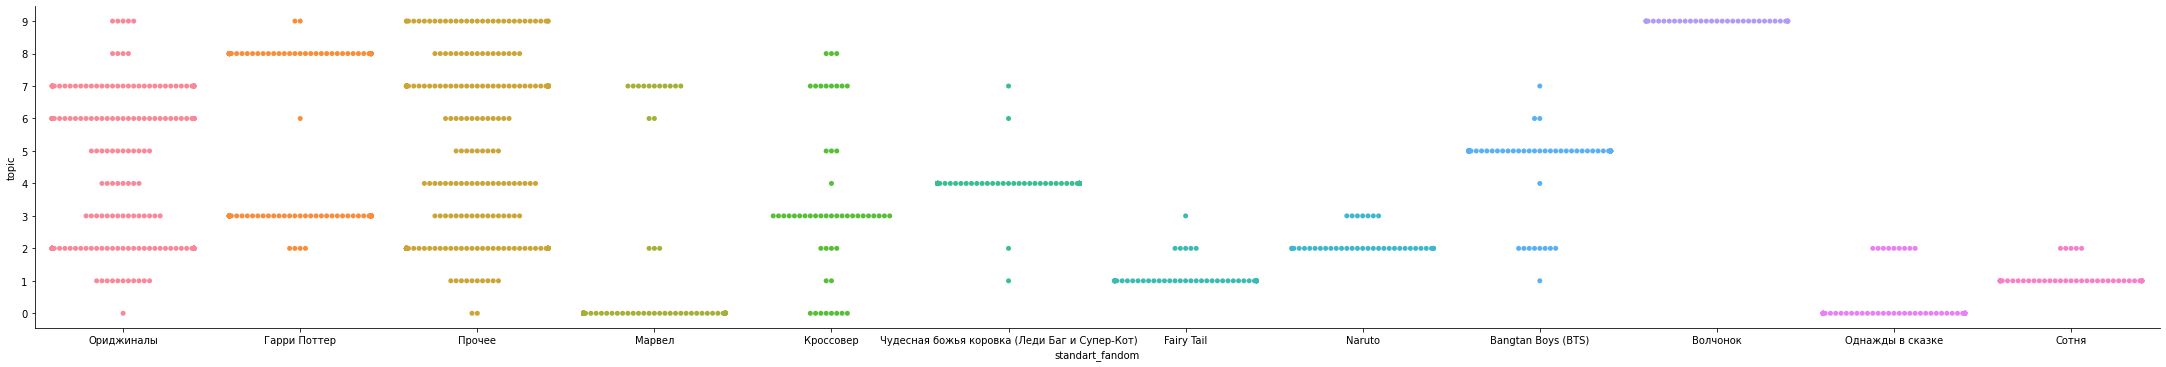

In [ ]:
sns.catplot(x="standart_fandom", y="topic", kind = "swarm",data=fanfic_data, height=5, aspect=6)


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 29.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 49.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 19.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 57.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


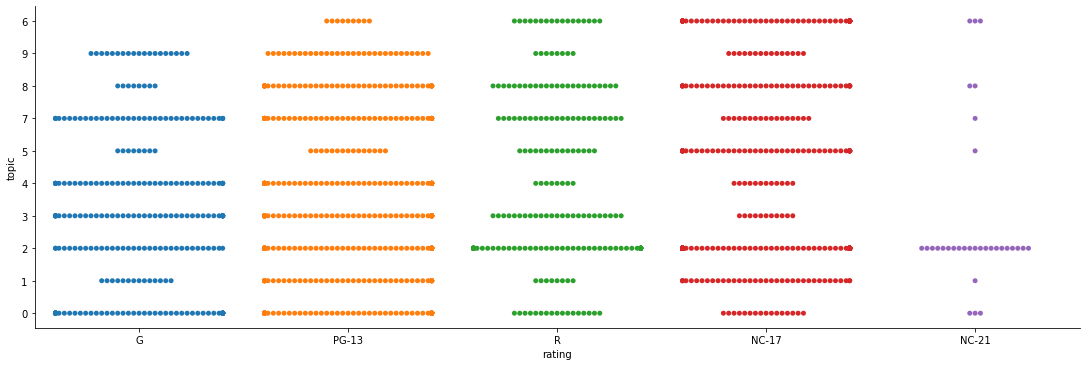

In [ ]:
sns.catplot(x="rating", y="topic", kind = "swarm",data=fanfic_data, height=5, aspect=3)


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 46.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 39.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 43.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


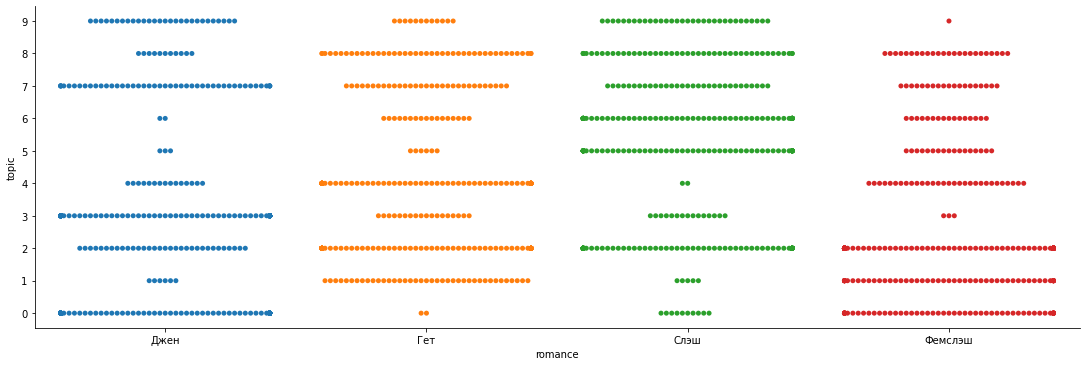

In [ ]:
sns.catplot(x="romance", y="topic", kind = "swarm",data=fanfic_data, height=5, aspect=3)


In [ ]:
def omega(data):
    omega = ""
    if "Омегаверс" in data:
        omega = "Омегаверс"
    else:
        omega = "Не омегаверс"   
    return omega

In [ ]:
fanfic_data['Omega'] = fanfic_data['tag'].apply(omega)
fanfic_data.head()

,Unnamed: 0,id,author,title,link,description,tag,likes,date,review,size,text,rating,parts,romance,fandom,genre,page,text_processed,standart_fandom,topic,probability,Omega
0,0,1,Olivia,Герои недописанных историй,/readfic/1920934,"Герои недописанных историй,\r\nзамерзшие во л...","Ангст,Драма,Стихи",13474,2014-04-28,1118,162,"Герои недописанных историй,\r\nЗамерзшие во ль...",G,Нет,Джен,Ориджиналы,Ангст,1,"[герой, недописанный, история, замёрзнуть, лёд...",Ориджиналы,2,0.459940,Не омегаверс
1,1,2,Джoкер,О войне писали много,/readfic/1743853,"Прах от тел, скелеты зданий,\r\nЛес сгоревший ...","Ангст,Драббл,Стихи",6621,2014-03-05,432,138,"О войне писали много,\r\nКак летит на землю пл...",G,Нет,Джен,Ориджиналы,Ангст,1,"[война, писать, лететь, земля, пламень, миг, с...",Ориджиналы,4,0.367312,Не омегаверс
2,2,3,лунный мечтатель полтергейста,Невыносимое создание,/readfic/8603938,У мальчишки Поттера глаза его деда и та же при...,"AU,Ангст,Детская влюбленность,Дружба,Наставнич...",5398,2019-09-03,97,1586,- Ты! Ты украл у меня слугу! \r\n Л...,PG-13,Нет,Джен,"Роулинг Джоан «Гарри Поттер»,Гарри Поттер",Ангст,1,"[украсть, слуга, люциус, хвататься, палочка, ж...",Гарри Поттер,3,0.647270,Не омегаверс
3,3,4,Хана_Вишнёвая,Ангелы падают,/readfic/1119388,Серый асфальт – конечная.,"Ангст,Драббл,Стихи,Эксперимент",5217,2013-08-19,181,127,Ангелы падают.\r\nАнгелы падают вниз.\r\nКрыль...,G,Нет,Джен,Ориджиналы,Ангст,1,"[ангел, падать, ангел, падать, крыло, держать,...",Ориджиналы,3,0.714868,Не омегаверс
4,4,5,LuckyLuke,Меня зовут Сэм,/readfic/3911101,"Меня зовут Сэм. Вернее, звали - в последней жи...","Hurt/Comfort,Ангст,Соулмейты,Эксперимент",4883,2015-12-29,403,3432,"Меня зовут Сэм. Вернее, звали — в последней жи...",R,Нет,Джен,Ориджиналы,Ангст,1,"[звать, сэм, верный, звать, последний, жизнь, ...",Ориджиналы,2,0.554361,Не омегаверс


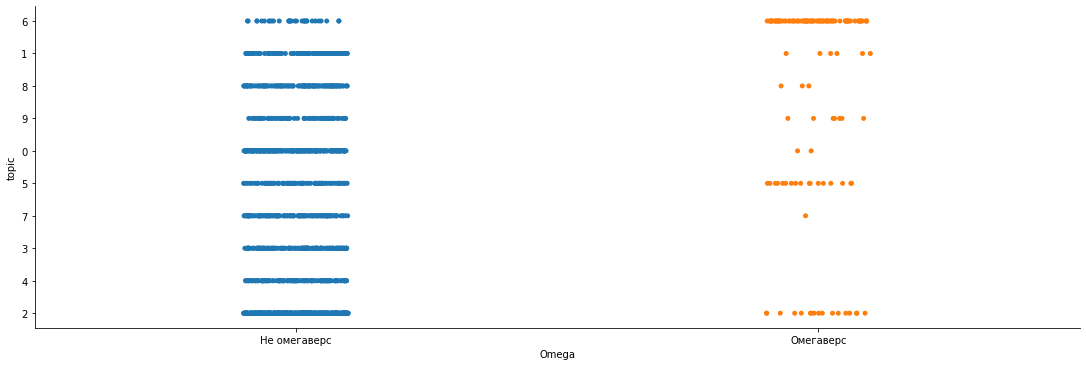

In [ ]:
sns.catplot(x="Omega", y="topic", kind = "strip",data=fanfic_data, height=5, aspect=3)


In [10]:
from gensim import corpora, models
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

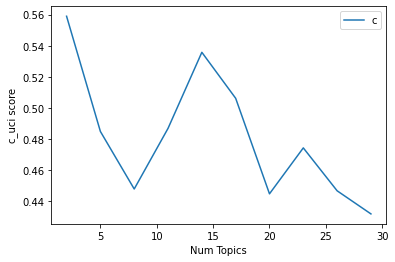

In [18]:
from gensim.models import CoherenceModel
model_list, coherence_values = compute_coherence_values(dictionary=gensim_dictionary_for_TM, corpus=corpus_tfidf, texts=fanfic_data['text_processed'], start=2, limit=30, step=3)
# Show graph
import matplotlib.pyplot as plt
limit=30; start=2; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("c_uci score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [21]:
lda = gensim.models.LdaMulticore(corpus_tfidf, 
                                 num_topics = 14, 
                                 id2word=gensim_dictionary_for_TM, 
                                 passes=10, random_state = 6457)

In [29]:
lda.print_topics()
fw = open("topics_tf-idf_8.txt", "w", encoding = "utf-8")
for topic in lda.print_topics():
    fw.write(str(topic)) 
    print(str(topic))
fw.close()  

(0, '0.000*"лис" + 0.000*"сие" + 0.000*"убийственный" + 0.000*"паркер" + 0.000*"шоу" + 0.000*"ванда" + 0.000*"наташа" + 0.000*"маринетта" + 0.000*"флэш" + 0.000*"экскурсия"')
(1, '0.006*"маринетта" + 0.004*"адриан" + 0.004*"кларк" + 0.004*"чонгук" + 0.003*"люси" + 0.003*"лекса" + 0.003*"чимин" + 0.003*"нуар" + 0.002*"тэхить" + 0.002*"юнга"')
(2, '0.002*"the" + 0.001*"давать-ка" + 0.001*"высоко" + 0.001*"бесстыжий" + 0.001*"сметать" + 0.001*"будни" + 0.001*"простыть" + 0.001*"утешить" + 0.001*"сердитый" + 0.000*"нитка"')
(3, '0.001*"меч" + 0.001*"ввысь" + 0.001*"гаснуть" + 0.001*"безнадёжно" + 0.001*"конь" + 0.001*"любящий" + 0.001*"костёр" + 0.001*"наверно" + 0.000*"общий-то" + 0.000*"гермиона"')
(4, '0.001*"текст" + 0.001*"затолкать" + 0.001*"рай" + 0.001*"рефлекс" + 0.001*"строка" + 0.001*"интимный" + 0.001*"средний" + 0.000*"чимин" + 0.000*"россия" + 0.000*"юнга"')
(5, '0.003*"чонгук" + 0.002*"тэ" + 0.001*"ким" + 0.001*"тэхить" + 0.001*"саша" + 0.001*"роковой" + 0.001*"блевать" + 0.

In [24]:
fanfic_data["t"]  = fanfic_data['text_processed'].apply(get_topic)

In [25]:
fanfic_data["topic"] = fanfic_data["t"].str[0]
fanfic_data["probability"] = fanfic_data["t"].str[1]
del fanfic_data['t']
fanfic_data.head()

,Unnamed: 0,id,author,title,link,description,tag,likes,date,review,size,text,rating,parts,romance,fandom,genre,page,text_processed,standart_fandom,topic,probability
0,0,1,Olivia,Герои недописанных историй,/readfic/1920934,"Герои недописанных историй,\r\nзамерзшие во л...","Ангст,Драма,Стихи",13474,2014-04-28,1118,162,"Герои недописанных историй,\r\nЗамерзшие во ль...",G,Нет,Джен,Ориджиналы,Ангст,1,"[герой, недописанный, история, замёрзнуть, лёд...",Ориджиналы,9,0.683138
1,1,2,Джoкер,О войне писали много,/readfic/1743853,"Прах от тел, скелеты зданий,\r\nЛес сгоревший ...","Ангст,Драббл,Стихи",6621,2014-03-05,432,138,"О войне писали много,\r\nКак летит на землю пл...",G,Нет,Джен,Ориджиналы,Ангст,1,"[война, писать, лететь, земля, пламень, миг, с...",Ориджиналы,1,0.596829
2,2,3,лунный мечтатель полтергейста,Невыносимое создание,/readfic/8603938,У мальчишки Поттера глаза его деда и та же при...,"AU,Ангст,Детская влюбленность,Дружба,Наставнич...",5398,2019-09-03,97,1586,- Ты! Ты украл у меня слугу! \r\n Л...,PG-13,Нет,Джен,"Роулинг Джоан «Гарри Поттер»,Гарри Поттер",Ангст,1,"[украсть, слуга, люциус, хвататься, палочка, ж...",Гарри Поттер,9,0.678270
3,3,4,Хана_Вишнёвая,Ангелы падают,/readfic/1119388,Серый асфальт – конечная.,"Ангст,Драббл,Стихи,Эксперимент",5217,2013-08-19,181,127,Ангелы падают.\r\nАнгелы падают вниз.\r\nКрыль...,G,Нет,Джен,Ориджиналы,Ангст,1,"[ангел, падать, ангел, падать, крыло, держать,...",Ориджиналы,9,0.811592
4,4,5,LuckyLuke,Меня зовут Сэм,/readfic/3911101,"Меня зовут Сэм. Вернее, звали - в последней жи...","Hurt/Comfort,Ангст,Соулмейты,Эксперимент",4883,2015-12-29,403,3432,"Меня зовут Сэм. Вернее, звали — в последней жи...",R,Нет,Джен,Ориджиналы,Ангст,1,"[звать, сэм, верный, звать, последний, жизнь, ...",Ориджиналы,9,0.586145


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 92.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 85.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 91.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 82.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 63.5% of the points cannot be placed; y

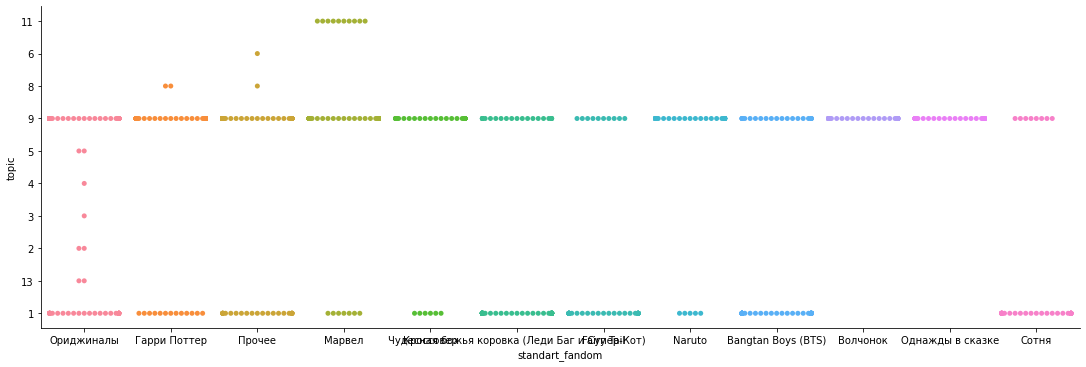

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.catplot(x="standart_fandom", y="topic", kind = "swarm",data=fanfic_data, height=5, aspect=3)